In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [19]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-28--14h-06m-26s',
 '2025-05-28--14h-08m-47s',
 '2025-05-28--14h-11m-10s',
 '2025-05-28--14h-13m-33s',
 '2025-05-28--14h-15m-56s',
 '2025-05-28--14h-18m-20s',
 '2025-05-28--14h-20m-43s',
 '2025-05-28--14h-23m-06s',
 '2025-05-28--14h-25m-29s',
 '2025-05-28--14h-27m-45s']

In [20]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-28--14h-06m-26s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0,2000
1,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0,2000
2,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000
3,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000
4,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2025-05-28--14h-25m-29s,3.0,1.0,148.0,8.0,160.0,NaN,2.735699,0.549467,2.792527,0,2000
292,2025-05-28--14h-25m-29s,1.0,0.0,188.0,11.0,200.0,NaN,2.793427,0.292843,2.792527,0,2000
293,2025-05-28--14h-25m-29s,4.5,1.0,186.0,8.5,200.0,NaN,2.751832,0.629015,2.792527,0,2000
294,2025-05-28--14h-25m-29s,33.0,1.0,2030.0,116.5,2180.5,124129.0,2.766628,0.489093,2.792527,0,2000


In [21]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-28--14h-06m-26s,2.0,38.0,0.0,0.0,40.0,NaN,0.317560,1.570796,0.000000,0,2000,0.0,0.0
1,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0,2000,0.0,0.0
2,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000,0.0,0.0
3,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000,0.0,0.0
4,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.224075,1.570796,0.000000,0,2000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2025-05-28--14h-25m-29s,3.0,1.0,148.0,8.0,160.0,NaN,2.735699,0.549467,2.792527,0,2000,160.0,0.0
292,2025-05-28--14h-25m-29s,1.0,0.0,188.0,11.0,200.0,NaN,2.793427,0.292843,2.792527,0,2000,160.0,0.0
293,2025-05-28--14h-25m-29s,4.5,1.0,186.0,8.5,200.0,NaN,2.751832,0.629015,2.792527,0,2000,160.0,0.0
294,2025-05-28--14h-25m-29s,33.0,1.0,2030.0,116.5,2180.5,124129.0,2.766628,0.489093,2.792527,0,2000,160.0,0.0


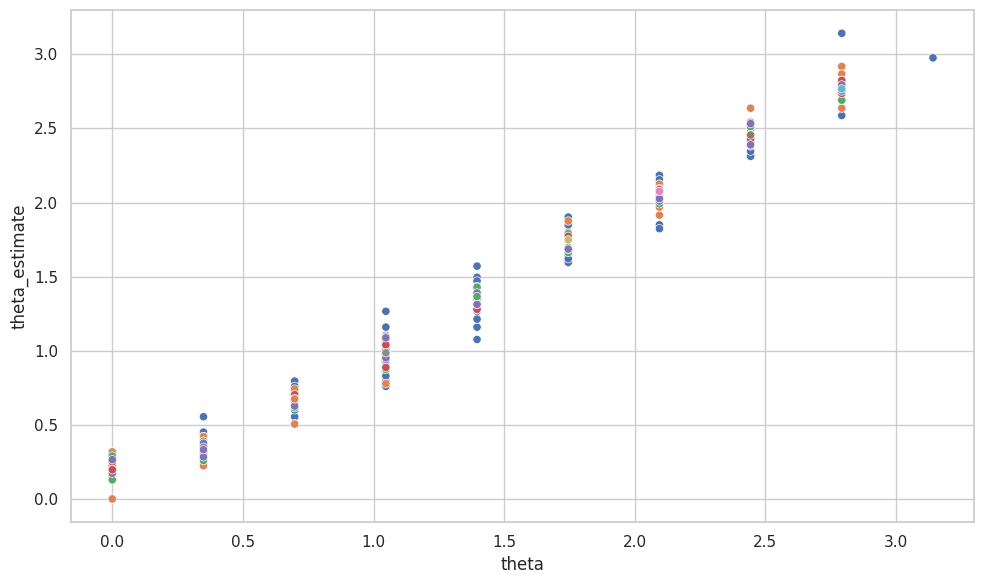

In [22]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

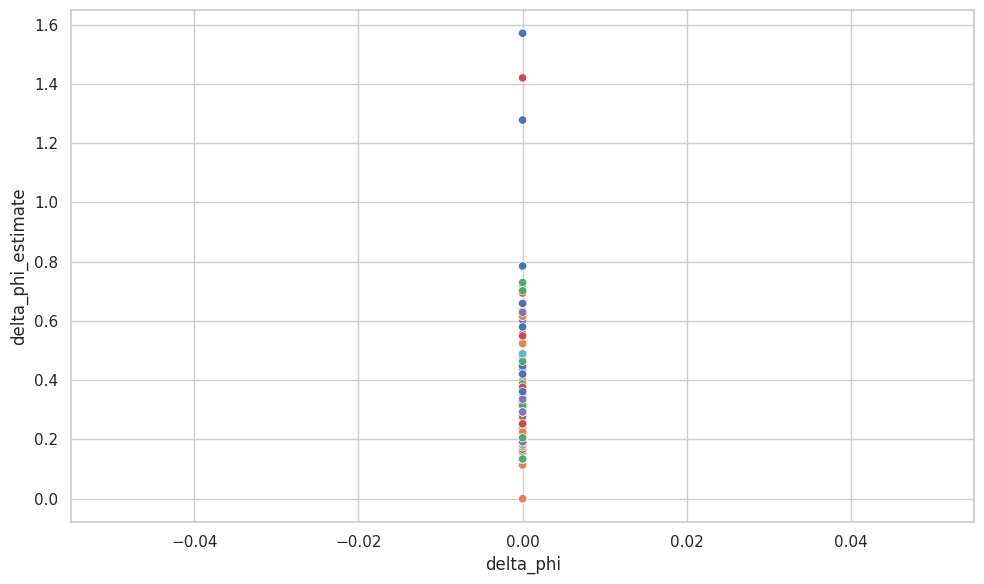

In [23]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [24]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory       N theta_estimate                      \
                                              mean       std       var   
0   2025-05-28--14h-06m-26s    40.0       0.177423  0.129405  0.016746   
1   2025-05-28--14h-06m-26s    80.0       0.195740  0.100459  0.010092   
2   2025-05-28--14h-06m-26s   120.0       0.209971  0.059192  0.003504   
3   2025-05-28--14h-06m-26s   160.0       0.215659  0.027312  0.000746   
4   2025-05-28--14h-06m-26s   200.0       0.213037  0.047263  0.002234   
5   2025-05-28--14h-06m-26s  2299.5       0.197052       NaN       NaN   
6   2025-05-28--14h-08m-47s    40.0       0.335647  0.094114  0.008857   
7   2025-05-28--14h-08m-47s    80.0       0.341543  0.068380  0.004676   
8   2025-05-28--14h-08m-47s   120.0       0.343758  0.055594  0.003091   
9   2025-05-28--14h-08m-47s   160.0       0.335711  0.034703  0.001204   
10  2025-05-28--14h-08m-47s   200.0       0.336115  0.047457  0.002252   
11  2025-05-28--14h-08m-47s  2357.0       0.332377       NaN       NaN   
12  2025-05-28--14h-11m-10s    40.0       0.653785  0.119151  0.014197   
13  2025-05-28--14h-11m-10s    80.0       0.647686  0.087544  0.007664   
14  2025-05-28--14h-11m-10s   120.0       0.665476  0.044042  0.001940   
15  2025-05-28--14h-11m-10s   160.0       0.683841  0.027983  0.000783   
16  2025-05-28--14h-11m-10s   200.0       0.651387  0.034992  0.001224   
17  2025-05-28--14h-11m-10s  2194.5       0.674461       NaN       NaN   
18  2025-05-28--14h-13m-33s    40.0       0.978874  0.117553  0.013819   
19  2025-05-28--14h-13m-33s    80.0       0.982294  0.080192  0.006431   
20  2025-05-28--14h-13m-33s   120.0       0.984231  0.068840  0.004739   
21  2025-05-28--14h-13m-33s   160.0       0.987367  0.062807  0.003945   
22  2025-05-28--14h-13m-33s   200.0       0.987332  0.067732  0.004588   
23  2025-05-28--14h-13m-33s  2179.0       0.985930       NaN       NaN   
24  2025-05-28--14h-15m-56s    40.0       1.336642  0.134231  0.018018   
25  2025-05-28--14h-15m-56s    80.0       1.332403  0.067138  0.004508   
26  2025-05-28--14h-15m-56s   120.0       1.338447  0.055443  0.003074   
27  2025-05-28--14h-15m-56s   160.0       1.315853  0.035595  0.001267   
28  2025-05-28--14h-15m-56s   200.0       1.338569  0.044376  0.001969   
29  2025-05-28--14h-15m-56s  2203.5       1.365592       NaN       NaN   
30  2025-05-28--14h-18m-20s    40.0       1.716615  0.107895  0.011641   
31  2025-05-28--14h-18m-20s    80.0       1.728385  0.098784  0.009758   
32  2025-05-28--14h-18m-20s   120.0       1.715970  0.065593  0.004302   
33  2025-05-28--14h-18m-20s   160.0       1.727845  0.062663  0.003927   
34  2025-05-28--14h-18m-20s   200.0       1.686051       NaN       NaN   
35  2025-05-28--14h-18m-20s  2180.0       1.747867       NaN       NaN   
36  2025-05-28--14h-20m-43s    40.0       2.038221  0.105628  0.011157   
37  2025-05-28--14h-20m-43s    80.0       2.036689  0.073215  0.005360   
38  2025-05-28--14h-20m-43s   120.0       2.036005  0.039228  0.001539   
39  2025-05-28--14h-20m-43s   160.0       2.047143  0.036223  0.001312   
40  2025-05-28--14h-20m-43s   200.0       2.035868  0.031919  0.001019   
41  2025-05-28--14h-20m-43s  2152.5       2.075586       NaN       NaN   
42  2025-05-28--14h-23m-06s    40.0       2.461066  0.105441  0.011118   
43  2025-05-28--14h-23m-06s    80.0       2.458453  0.083383  0.006953   
44  2025-05-28--14h-23m-06s   120.0       2.459273  0.061851  0.003826   
45  2025-05-28--14h-23m-06s   160.0       2.459606  0.071119  0.005058   
46  2025-05-28--14h-23m-06s   200.0       2.460663  0.101179  0.010237   
47  2025-05-28--14h-23m-06s  2142.0       2.455261       NaN       NaN   
48  2025-05-28--14h-25m-29s    40.0       2.800278  0.151394  0.022920   
49  2025-05-28--14h-25m-29s    80.0       2.784856  0.110222  0.012149   
50  2025-05-28--14h-25m-29s   120.0       2.779543  0.077057  0.005938   
51  2025-05-28--14h-25m-29s   160.0       2.779866  0.062461  0.003901   
52  2025-05-28--1

In [25]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory       N theta_estimate                      \
                                              mean       std       var   
0   2025-05-28--14h-06m-26s    40.0       0.177423  0.129405  0.016746   
1   2025-05-28--14h-06m-26s    80.0       0.195740  0.100459  0.010092   
2   2025-05-28--14h-06m-26s   120.0       0.209971  0.059192  0.003504   
3   2025-05-28--14h-06m-26s   160.0       0.215659  0.027312  0.000746   
4   2025-05-28--14h-06m-26s   200.0       0.213037  0.047263  0.002234   
5   2025-05-28--14h-06m-26s  2299.5       0.197052       NaN       NaN   
6   2025-05-28--14h-08m-47s    40.0       0.335647  0.094114  0.008857   
7   2025-05-28--14h-08m-47s    80.0       0.341543  0.068380  0.004676   
8   2025-05-28--14h-08m-47s   120.0       0.343758  0.055594  0.003091   
9   2025-05-28--14h-08m-47s   160.0       0.335711  0.034703  0.001204   
10  2025-05-28--14h-08m-47s   200.0       0.336115  0.047457  0.002252   
11  2025-05-28--14h-08m-47s  2357.0       0.332377       NaN       NaN   
12  2025-05-28--14h-11m-10s    40.0       0.653785  0.119151  0.014197   
13  2025-05-28--14h-11m-10s    80.0       0.647686  0.087544  0.007664   
14  2025-05-28--14h-11m-10s   120.0       0.665476  0.044042  0.001940   
15  2025-05-28--14h-11m-10s   160.0       0.683841  0.027983  0.000783   
16  2025-05-28--14h-11m-10s   200.0       0.651387  0.034992  0.001224   
17  2025-05-28--14h-11m-10s  2194.5       0.674461       NaN       NaN   
18  2025-05-28--14h-13m-33s    40.0       0.978874  0.117553  0.013819   
19  2025-05-28--14h-13m-33s    80.0       0.982294  0.080192  0.006431   
20  2025-05-28--14h-13m-33s   120.0       0.984231  0.068840  0.004739   
21  2025-05-28--14h-13m-33s   160.0       0.987367  0.062807  0.003945   
22  2025-05-28--14h-13m-33s   200.0       0.987332  0.067732  0.004588   
23  2025-05-28--14h-13m-33s  2179.0       0.985930       NaN       NaN   
24  2025-05-28--14h-15m-56s    40.0       1.336642  0.134231  0.018018   
25  2025-05-28--14h-15m-56s    80.0       1.332403  0.067138  0.004508   
26  2025-05-28--14h-15m-56s   120.0       1.338447  0.055443  0.003074   
27  2025-05-28--14h-15m-56s   160.0       1.315853  0.035595  0.001267   
28  2025-05-28--14h-15m-56s   200.0       1.338569  0.044376  0.001969   
29  2025-05-28--14h-15m-56s  2203.5       1.365592       NaN       NaN   
30  2025-05-28--14h-18m-20s    40.0       1.716615  0.107895  0.011641   
31  2025-05-28--14h-18m-20s    80.0       1.728385  0.098784  0.009758   
32  2025-05-28--14h-18m-20s   120.0       1.715970  0.065593  0.004302   
33  2025-05-28--14h-18m-20s   160.0       1.727845  0.062663  0.003927   
34  2025-05-28--14h-18m-20s   200.0       1.686051       NaN       NaN   
35  2025-05-28--14h-18m-20s  2180.0       1.747867       NaN       NaN   
36  2025-05-28--14h-20m-43s    40.0       2.038221  0.105628  0.011157   
37  2025-05-28--14h-20m-43s    80.0       2.036689  0.073215  0.005360   
38  2025-05-28--14h-20m-43s   120.0       2.036005  0.039228  0.001539   
39  2025-05-28--14h-20m-43s   160.0       2.047143  0.036223  0.001312   
40  2025-05-28--14h-20m-43s   200.0       2.035868  0.031919  0.001019   
41  2025-05-28--14h-20m-43s  2152.5       2.075586       NaN       NaN   
42  2025-05-28--14h-23m-06s    40.0       2.461066  0.105441  0.011118   
43  2025-05-28--14h-23m-06s    80.0       2.458453  0.083383  0.006953   
44  2025-05-28--14h-23m-06s   120.0       2.459273  0.061851  0.003826   
45  2025-05-28--14h-23m-06s   160.0       2.459606  0.071119  0.005058   
46  2025-05-28--14h-23m-06s   200.0       2.460663  0.101179  0.010237   
47  2025-05-28--14h-23m-06s  2142.0       2.455261       NaN       NaN   
48  2025-05-28--14h-25m-29s    40.0       2.800278  0.151394  0.022920   
49  2025-05-28--14h-25m-29s    80.0       2.784856  0.110222  0.012149   
50  2025-05-28--14h-25m-29s   120.0       2.779543  0.077057  0.005938   
51  2025-05-28--14h-25m-29s   160.0       2.779866  0.062461  0.003901   
52  2025-05-28--1

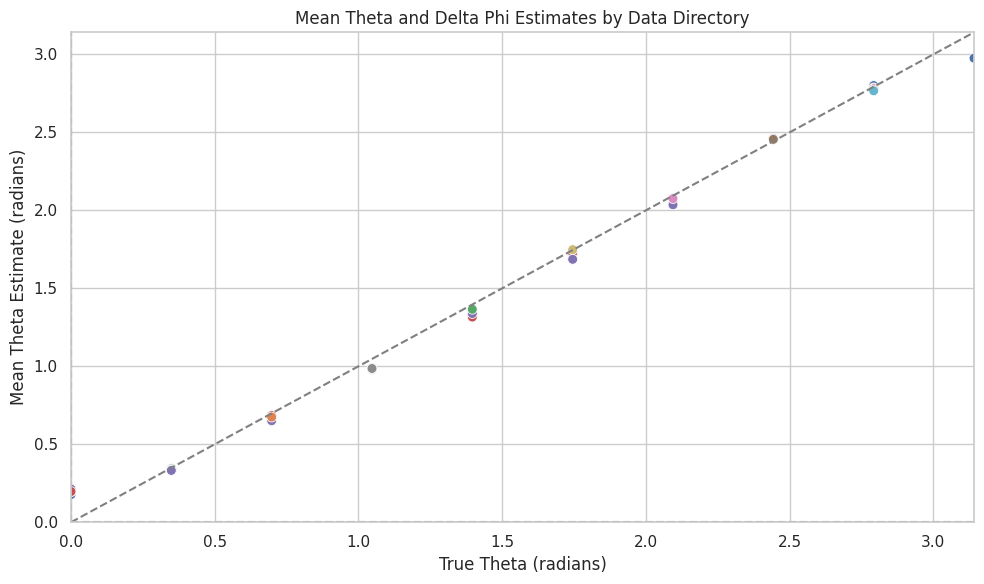

In [41]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("True Theta (radians)")
plt.ylabel("Mean Theta Estimate (radians)")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

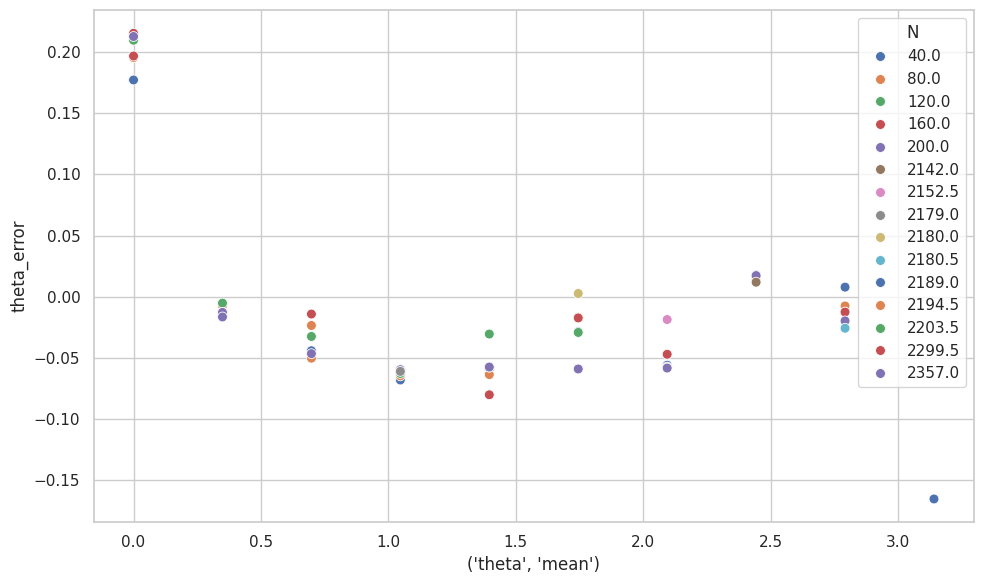

In [27]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [38]:
fixed_n_estimates_summary_df = estimates_summary_df[estimates_summary_df["N"].isin([40, 80, 120, 160, 200])].reset_index(drop=True)
fixed_n_estimates_summary_df

Data Directory      N theta_estimate                      \
                                             mean       std       var   
0   2025-05-28--14h-06m-26s   40.0       0.177423  0.129405  0.016746   
1   2025-05-28--14h-06m-26s   80.0       0.195740  0.100459  0.010092   
2   2025-05-28--14h-06m-26s  120.0       0.209971  0.059192  0.003504   
3   2025-05-28--14h-06m-26s  160.0       0.215659  0.027312  0.000746   
4   2025-05-28--14h-06m-26s  200.0       0.213037  0.047263  0.002234   
5   2025-05-28--14h-08m-47s   40.0       0.335647  0.094114  0.008857   
6   2025-05-28--14h-08m-47s   80.0       0.341543  0.068380  0.004676   
7   2025-05-28--14h-08m-47s  120.0       0.343758  0.055594  0.003091   
8   2025-05-28--14h-08m-47s  160.0       0.335711  0.034703  0.001204   
9   2025-05-28--14h-08m-47s  200.0       0.336115  0.047457  0.002252   
10  2025-05-28--14h-11m-10s   40.0       0.653785  0.119151  0.014197   
11  2025-05-28--14h-11m-10s   80.0       0.647686  0.087544  0.007664   
12  2025-05-28--14h-11m-10s  120.0       0.665476  0.044042  0.001940   
13  2025-05-28--14h-11m-10s  160.0       0.683841  0.027983  0.000783   
14  2025-05-28--14h-11m-10s  200.0       0.651387  0.034992  0.001224   
15  2025-05-28--14h-13m-33s   40.0       0.978874  0.117553  0.013819   
16  2025-05-28--14h-13m-33s   80.0       0.982294  0.080192  0.006431   
17  2025-05-28--14h-13m-33s  120.0       0.984231  0.068840  0.004739   
18  2025-05-28--14h-13m-33s  160.0       0.987367  0.062807  0.003945   
19  2025-05-28--14h-13m-33s  200.0       0.987332  0.067732  0.004588   
20  2025-05-28--14h-15m-56s   40.0       1.336642  0.134231  0.018018   
21  2025-05-28--14h-15m-56s   80.0       1.332403  0.067138  0.004508   
22  2025-05-28--14h-15m-56s  120.0       1.338447  0.055443  0.003074   
23  2025-05-28--14h-15m-56s  160.0       1.315853  0.035595  0.001267   
24  2025-05-28--14h-15m-56s  200.0       1.338569  0.044376  0.001969   
25  2025-05-28--14h-18m-20s   40.0       1.716615  0.107895  0.011641   
26  2025-05-28--14h-18m-20s   80.0       1.728385  0.098784  0.009758   
27  2025-05-28--14h-18m-20s  120.0       1.715970  0.065593  0.004302   
28  2025-05-28--14h-18m-20s  160.0       1.727845  0.062663  0.003927   
29  2025-05-28--14h-18m-20s  200.0       1.686051       NaN       NaN   
30  2025-05-28--14h-20m-43s   40.0       2.038221  0.105628  0.011157   
31  2025-05-28--14h-20m-43s   80.0       2.036689  0.073215  0.005360   
32  2025-05-28--14h-20m-43s  120.0       2.036005  0.039228  0.001539   
33  2025-05-28--14h-20m-43s  160.0       2.047143  0.036223  0.001312   
34  2025-05-28--14h-20m-43s  200.0       2.035868  0.031919  0.001019   
35  2025-05-28--14h-23m-06s   40.0       2.461066  0.105441  0.011118   
36  2025-05-28--14h-23m-06s   80.0       2.458453  0.083383  0.006953   
37  2025-05-28--14h-23m-06s  120.0       2.459273  0.061851  0.003826   
38  2025-05-28--14h-23m-06s  160.0       2.459606  0.071119  0.005058   
39  2025-05-28--14h-23m-06s  200.0       2.460663  0.101179  0.010237   
40  2025-05-28--14h-25m-29s   40.0       2.800278  0.151394  0.022920   
41  2025-05-28--14h-25m-29s   80.0       2.784856  0.110222  0.012149   
42  2025-05-28--14h-25m-29s  120.0       2.779543  0.077057  0.005938   
43  2025-05-28--14h-25m-29s  160.0       2.779866  0.062461  0.003901   
44  2025-05-28--14h-25m-29s  200.0       2.772629  0.029412  0.000865   

   delta_phi_estimate                         theta delta_phi   2_n_var  \
                 mean       std       var      mean      mean             
0            1.570796  0.000000  0.000000  0.000000       0.0  1.339646   
1            1.570796  0.000000  0.000000  0.000000       0.0  1.614727   
2            1.570796  0.000000  0.000000  0.000000       0.0  0.840894   
3            1.570796  0.000000  0.000000  0.000000       0.0  0.238709   
4            1.570796  0.000000  0.000000  0.000000       0.0  0.893525   
5            0.640213  0.437860  0.191721  0.349066     

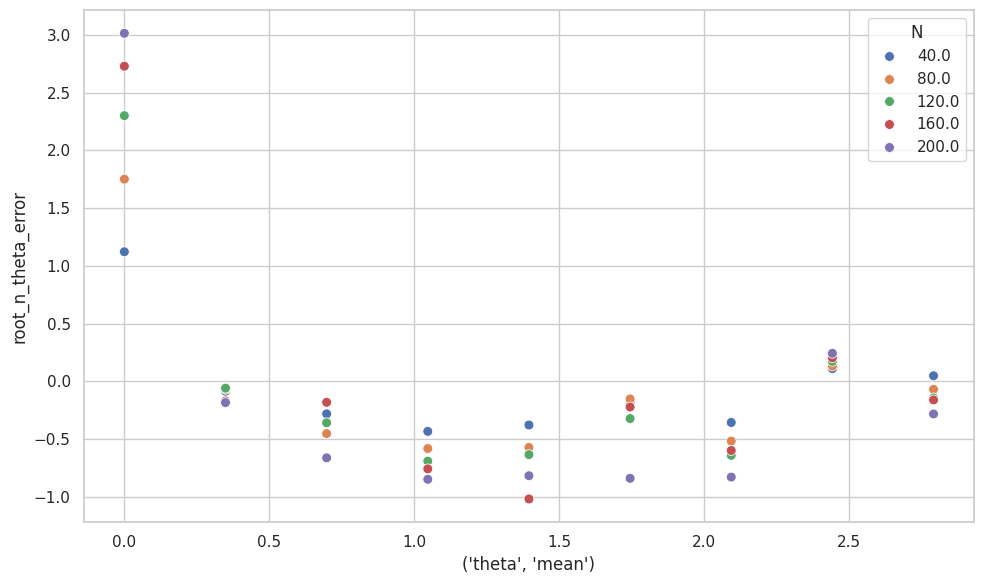

In [40]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

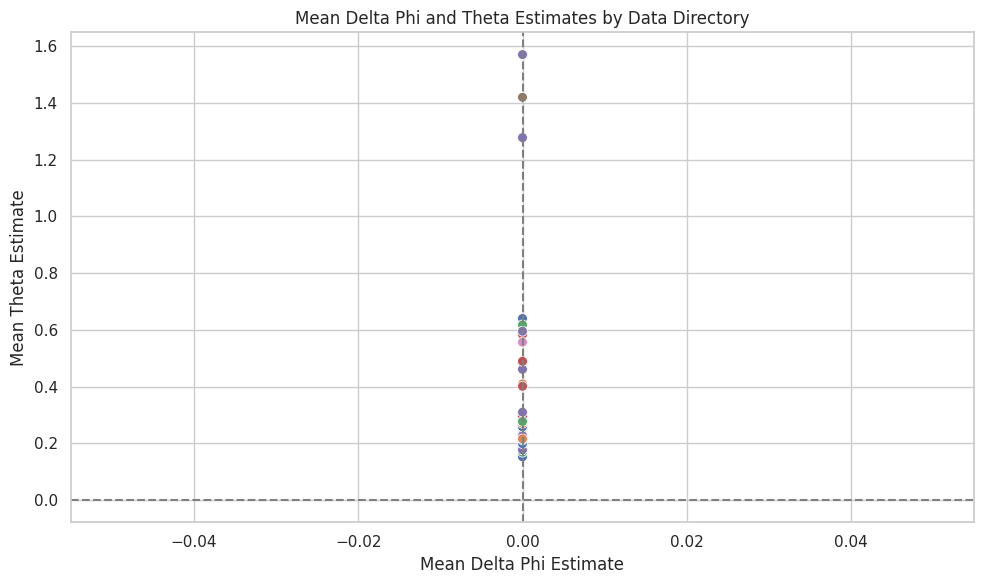

In [29]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

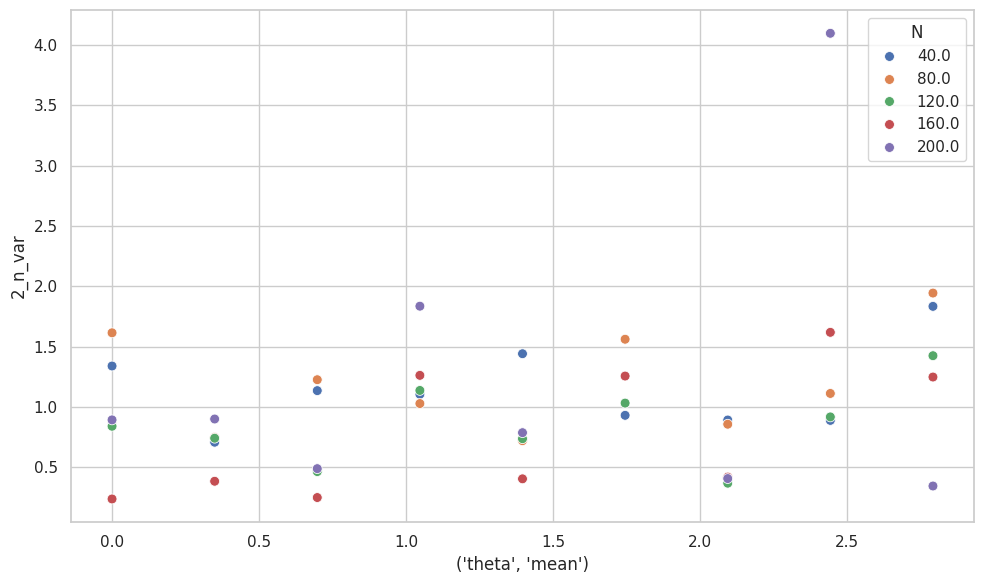

In [39]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fixed_n_estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=fixed_n_estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

# Best guess estimators 

Using all samples in the data_dir to estimate

In [31]:
# Row of max N in each data_dir
estimates_summary_df["max_N"] = estimates_summary_df.groupby("Data Directory")["N"].transform("max")
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


Data Directory       N theta_estimate         delta_phi_estimate  \
                                             mean std var               mean   
0  2025-05-28--14h-06m-26s  2299.5       0.197052 NaN NaN           1.420323   
1  2025-05-28--14h-08m-47s  2357.0       0.332377 NaN NaN           0.556562   
2  2025-05-28--14h-11m-10s  2194.5       0.674461 NaN NaN           0.303848   
3  2025-05-28--14h-13m-33s  2179.0       0.985930 NaN NaN           0.232133   
4  2025-05-28--14h-15m-56s  2203.5       1.365592 NaN NaN           0.211197   
5  2025-05-28--14h-18m-20s  2180.0       1.747867 NaN NaN           0.198743   
6  2025-05-28--14h-20m-43s  2152.5       2.075586 NaN NaN           0.215936   
7  2025-05-28--14h-23m-06s  2142.0       2.455261 NaN NaN           0.276833   
8  2025-05-28--14h-25m-29s  2180.5       2.766628 NaN NaN           0.489093   
9  2025-05-28--14h-27m-45s  2189.0       2.975844 NaN NaN           1.277954   

              theta delta_phi 2_n_var theta_error root_n_theta_error   max_N  
  std var      mean      mean                                                 
0 NaN NaN  0.000000       0.0     NaN    0.197052           9.449262  2299.5  
1 NaN NaN  0.349066       0.0     NaN   -0.016689          -0.810224  2357.0  
2 NaN NaN  0.698132       0.0     NaN   -0.023670          -1.108855  2194.5  
3 NaN NaN  1.047198       0.0     NaN   -0.061268          -2.859965  2179.0  
4 NaN NaN  1.396263       0.0     NaN   -0.030671          -1.439738  2203.5  
5 NaN NaN  1.745329       0.0     NaN    0.002538           0.118488  2180.0  
6 NaN NaN  2.094395       0.0     NaN   -0.018809          -0.872631  2152.5  
7 NaN NaN  2.443461       0.0     NaN    0.011800           0.546144  2142.0  
8 NaN NaN  2.792527       0.0     NaN   -0.025899          -1.209372  2180.5  
9 NaN NaN  3.141593       0.0     NaN   -0.165749          -7.754841  2189.0

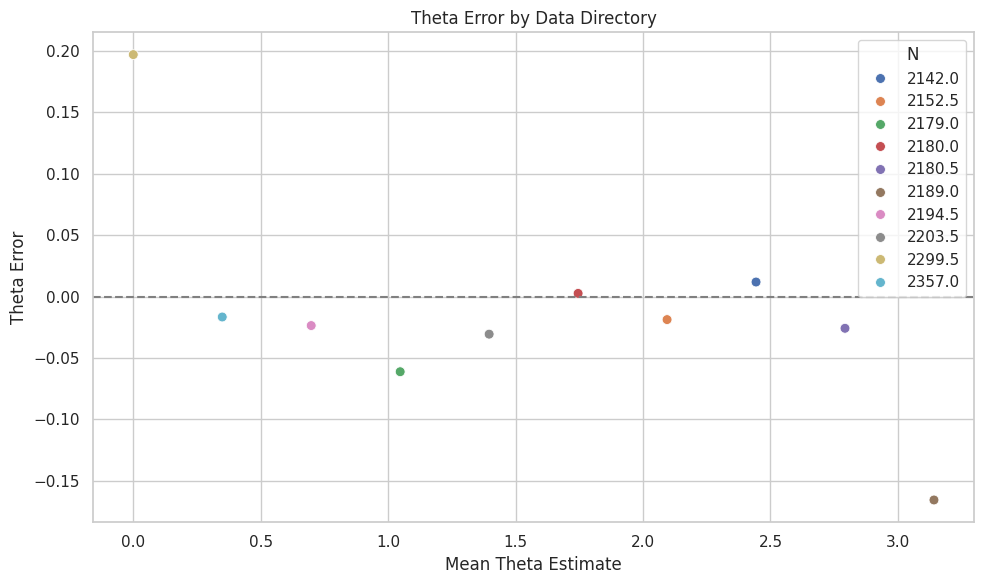

In [32]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()